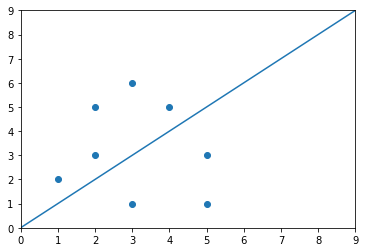

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import c_

sam = np.array([[1,2],[2,3],[2,5],[3,1],[3,6],[4,5],[5,1],[5,3]]) #设定初始的点位
#原始点位图
plt.scatter(sam[:,0], sam[:,1])
plt.plot([0,10],[0,10]) #初始拟合线y=x
plt.xlim(0,9)
plt.ylim(0,9)
plt.show()

$$
Y=\begin{pmatrix} y_1 \\ y_2 \\ .\\.\\ y_n \end{pmatrix}_{nx1},
B=\begin{pmatrix} b \\ w \end{pmatrix}_{2x1},
\\
X = \begin{pmatrix} 1&x_1 \\ 1&x_2 \\ .\\ .\\ 1&x_n \end{pmatrix}_{nx2},
e = \begin{pmatrix} e_1 \\ e_2 \\ .\\.\\ e_n \end{pmatrix}_{nx1}
$$
So we have,
$$
Y = X \cdot B+e
\\
Q = (Y-X\cdot B)^T(Y-X\cdot B)
$$


#### Find the derivative of *Q*
$$
 \frac{\partial Q}{\partial B}=-X^TY+X^TXB=\begin{pmatrix} \frac{\partial Q}{\partial b} \\ \frac{\partial Q}{\partial w} \end{pmatrix}
$$

#### Then, change the B,
$$
B_{t+1} = B_t - lr *  \frac{\partial Q}{\partial B}
$$

In [151]:
#根据上面的公式分别求出Q对B的偏导、变化后的B、残差平方和Q
def deltaB(sam, B_init, lr=0.01):
    X = scipy.c_[np.ones(sam.shape[0]),sam[:,0]]
    Y = sam[:,1]
    Q = np.dot((Y - np.dot(X,B_init)).T,Y - np.dot(X,B_init))
    Q_B = -np.dot(X.T,Y) + np.dot(np.dot(X.T,X),B_init)
    B = B_init - lr * Q_B
    
    return Q_B, B, Q

In [152]:
iter_num = 5000
B_init = np.array([0,0])
#以下三个_his用来存放每次生成的值
B_his = B_init
Q_B_his = np.array([0,0])
Q_his = []
for i in range(iter_num):
    sel = np.random.choice(sam.shape[0],6,replace=False) #随机挑选点
    Q_B,B,Q = deltaB(sam[sel], B_his.reshape(2,-1)[:,i])
    Q_B_his = scipy.c_[Q_B_his,Q_B]
    B_his = np.round(scipy.c_[B_his,B],4)
    Q_his.append(Q.tolist())

In [153]:
B_his #每一列代表一个B

array([[ 0.    ,  0.2   ,  0.256 , ...,  3.8195,  3.8403,  3.8048],
       [ 0.    ,  0.66  ,  0.752 , ..., -0.3154, -0.2246, -0.303 ]])

In [154]:
Q_B_his

array([[  0.    , -20.    ,  -5.6   , ...,   6.894 ,  -2.0756,   3.5498],
       [  0.    , -66.    ,  -9.2   , ...,  23.5648,  -9.0845,   7.838 ]])

In [155]:
Q_his

[84.0,
 29.248,
 27.102463999999998,
 34.66769016000001,
 21.68869056,
 34.62317374,
 33.01684774,
 30.159344960000002,
 35.090850460000006,
 24.7932167,
 25.350568269999997,
 36.57782744,
 28.477225979999993,
 36.43690024,
 28.262619439999995,
 24.88348534,
 27.49287912,
 26.87273824,
 27.13137622,
 30.85815838,
 30.739034750000002,
 33.23147264,
 19.048770800000007,
 31.55690752,
 32.05061626,
 21.43862747,
 24.12688384,
 15.82405939,
 17.883524299999998,
 26.75745714,
 22.422188409999997,
 30.01126206,
 32.6211022,
 20.614426359999996,
 32.38540854,
 28.0975575,
 25.16334974,
 29.90723854,
 27.98537092,
 23.9461596,
 32.29749806,
 24.464350000000003,
 28.444104059999997,
 33.37409788,
 21.72346316,
 28.793823260000003,
 28.43349946,
 22.349163400000002,
 20.580198000000003,
 30.726724000000004,
 24.15121766,
 27.70026622,
 26.155815840000002,
 16.03529674,
 26.974135999999994,
 20.23409015,
 24.156695739999996,
 16.485829999999996,
 14.43872542,
 33.7862099,
 26.484059839999997,
 21

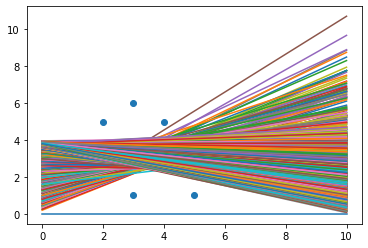

In [156]:
x=np.array([0,10])
y=B_his[0,0]+B_his[1,0]*x #y的初始值
for j in range(1,B_his.shape[1]):
    y = scipy.c_[y,B_his[0,j]+B_his[1,j]*x] #把每个B对应的y放到一起

plt.scatter(sam[:,0], sam[:,1])
plt.plot(x,y)
plt.show()

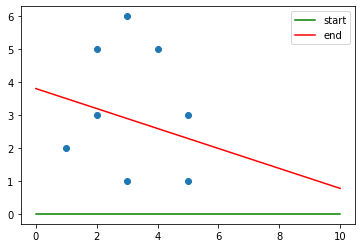

In [157]:
plt.scatter(sam[:,0], sam[:,1])
plt.plot(x,y[:,0],c='g',label='start') #最初始
plt.plot(x,y[:,y.shape[1]-1],c='r',label='end') #最终
plt.legend()

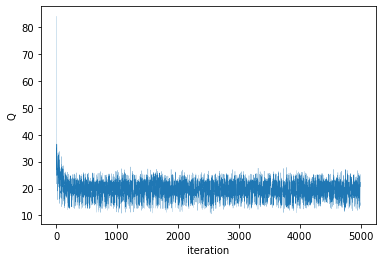

In [158]:
#Q残差平方和图
plt.plot(range(1,iter_num+1),Q_his,linewidth=0.2)
plt.xlabel('iteration')
plt.ylabel('Q')
plt.show()

# let's use some *fit* data

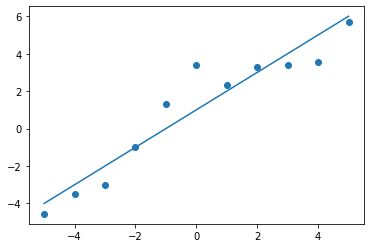

In [361]:
left=-5
right=6
xt = np.arange(left,right)
e = np.random.randn(xt.size)
yt = xt + 1 + e
t = np.array([1,1])

plt.scatter(xt,yt)
plt.plot(xt,yt-e)
plt.show()

In [362]:
sam1 = scipy.c_[xt,yt]
sam1

array([[-5.        , -4.56022502],
       [-4.        , -3.50867966],
       [-3.        , -2.9901727 ],
       [-2.        , -0.97179899],
       [-1.        ,  1.32968718],
       [ 0.        ,  3.42147737],
       [ 1.        ,  2.33855548],
       [ 2.        ,  3.26451548],
       [ 3.        ,  3.37425104],
       [ 4.        ,  3.54804716],
       [ 5.        ,  5.71488862]])

$$
Y=\begin{pmatrix} y_1 \\ y_2 \\ .\\.\\ y_{14} \end{pmatrix}_{14x1},
B=\begin{pmatrix} b \\ w \end{pmatrix}_{2x1},
\\
X = \begin{pmatrix} 1&x_1 \\ 1&x_2 \\ .\\ .\\ 1&x_{14} \end{pmatrix}_{14x2},
e = \begin{pmatrix} e_1 \\ e_2 \\ .\\.\\ e_{14} \end{pmatrix}_{14x1}
$$
So we have,
$$
Y = X \cdot B+e
\\
Q = (Y-X\cdot B)^T(Y-X\cdot B)
$$


#### Find the derivative of *Q*
$$
 \frac{\partial Q}{\partial B}=-X^TY+X^TXB=\begin{pmatrix} \frac{\partial Q}{\partial b} \\ \frac{\partial Q}{\partial w} \end{pmatrix}
$$

#### Then, change the B,
$$
B_{t+1} = B_t - lr *  \frac{\partial Q}{\partial B}
$$

In [363]:
#根据上面的公式分别求出Q对B的偏导、变化后的B、残差平方和Q
def deltaB(sam, B_init, lr=0.01):
    X = scipy.c_[np.ones(sam.shape[0]),sam[:,0]]
    Y = sam[:,1]
    Q = np.dot((Y - np.dot(X,B_init)).T,Y - np.dot(X,B_init))
    Q_B = -np.dot(X.T,Y) + np.dot(np.dot(X.T,X),B_init)
    B = B_init - lr * Q_B
    
    return Q_B, B, Q

In [369]:
iter_num = 500
B_init = np.array([-5,-1.3])
#以下三个_his用来存放每次生成的值
B_his = B_init
Q_B_his = np.array([0,0])
Q_his = []
for i in range(iter_num):
    sel = np.random.choice(sam1.shape[0],sam1.shape[0]-2,replace=False) #随机挑选点
    Q_B,B,Q = deltaB(sam1[sel], B_his.reshape(2,-1)[:,i])
    Q_B_his = scipy.c_[Q_B_his,Q_B]
    B_his = np.round(scipy.c_[B_his,B],4)
    Q_his.append(Q.tolist())

In [370]:
y=B_his[0,0]+B_his[1,0]*x #y的初始值
for j in range(1,B_his.shape[1]):
    y = scipy.c_[y,B_his[0,j]+B_his[1,j]*x] #把每个B对应的y放到一起

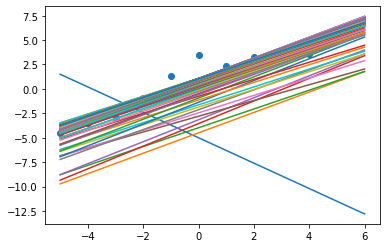

In [371]:
x = np.array([left,right])
plt.scatter(sam1[:,0], sam1[:,1])
plt.plot(x,y)
plt.show()

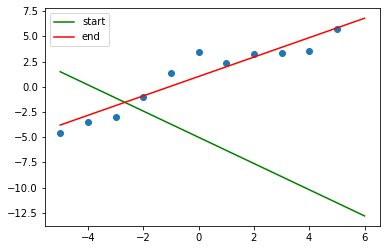

In [372]:
plt.scatter(sam1[:,0], sam1[:,1])
plt.plot(x,y[:,0],c='g',label='start') #最初始
plt.plot(x,y[:,y.shape[1]-1],c='r',label='end') #最终
plt.legend()

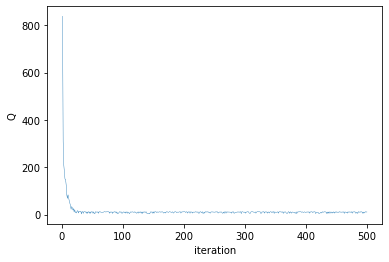

In [373]:
#Q残差平方和图
plt.plot(range(1,iter_num+1),Q_his,linewidth=0.4)
plt.xlabel('iteration')
plt.ylabel('Q')
plt.show()